In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Coast)
case_wide = 'Wide Coast'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_straight['xh']==211)[0][0]
x_east = np.where(dy_straight['xh']==351)[0][0]
y = np.where(dy_straight['yq']==-35)[0][0]
y_south = np.where(dy_straight['yq']==-71)[0][0]
y_north = np.where(dy_straight['yq']==71)[0][0]

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [12]:
def calculate_basin_sfn_z(vmo, vhGM, x_west, x_east, y_south, y_north):
#     vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
#     vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
#     vmo_slice = vmo.mean(dim='time')
#     vhGM_slice = vhGM.mean(dim='time')
#     sfn_basin_resmean = (np.cumsum(np.nansum((vmo_slice[:,y_south:y_north,x_west:x_east])/1035, axis=2), axis=0))/(1e6)
#     sfn_basin_res = (np.cumsum(np.nansum((vhGM_slice[:,y_south:y_north,x_west:x_east])/1035, axis=2), axis=0))/(1e6)
#     sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
#     return sfn_basin_mean, sfn_basin_res, sfn_basin_resmean

    vmo_slice = vmo.mean(dim='time')
    vhGM_slice = vhGM.mean(dim='time')
    sfn_basin_resmean = (vmo_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_res = (vhGM_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean

def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):

    vmo_slice = vmo.mean(dim='time')
    vhGM_slice = vhGM.mean(dim='time')
    sfn_basin_resmean = (vmo_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='rho2_l')/(1e6)
    sfn_basin_res = (vhGM_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='rho2_l')/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean


def find_max_sfn_lat(sfn_basin_resmean_z, dataset, lat_s=-30, lat_n=60):
#     max_value = sfn_basin_resmean[:,0:49].max()
#     max_index = np.where(sfn_basin_resmean[:,0:49] == max_value)
    
    psi_max=[]
    for i in range(len(dataset.z_l)):

        sfn_max = sfn_basin_resmean_z.isel(z_l=i).sel(yq=slice(20,60)).max()
        test = np.where(sfn_basin_resmean_z.sel(yq=slice(20,60)).isel(z_l=i) == sfn_max)
#     print(test)
        psi_max_tmp = sfn_basin_resmean_z.sel(yq=slice(20,60)).isel(z_l=i)[test[0][0]]
        psi_max.append(psi_max_tmp)
        
    lat = dataset.z_l * 0

    for i in range(len(dataset.z_l)):
        tmp = psi_max[i].yq
        lat[i] = tmp
        
    max_ind = np.argmax(np.array(psi_max))
    max_depth_lat = psi_max[max_ind]

    return(psi_max, lat, max_depth_lat)#, max_depth, max_lat)


def plot_sfn_mapped2depth(sfn_small_resmean, 
                          sfn_bound, 
                          dataset, 
                          lat_north, 
                          lat,
                          z_dataset,
                          max_depth_lat,
                          case):
    
    h_small = dataset.h.isel(xh=slice(x_west,x_east)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')
    
    depth_small = h_small.cumsum(dim='rho2_l')

    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(9,4))

#     fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,4))
    # Remove horizontal space between axes
#     fig.subplots_adjust(hspace=0)
    
    cf = ax.contourf(lat_north, depth_small, 
                 sfn_small_resmean, b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    
    plt.plot(lat, z_dataset.z_l, color='gray', linewidth=3, linestyle='dashed')
    plt.plot(max_depth_lat.yq, max_depth_lat.z_l, 'o', color='gray', markersize=10)
    
    plt.title('{}'.format(case)+' Small Basin MOC', fontsize=16)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    plt.xlabel('Latitude', fontsize=14), plt.ylabel('Depth [m]', fontsize=14)
    # ax.set_ylabel('Depth [m]', fontsize=14), ax.set_xlabel('Latitude', fontsize=14)
#     plt.show()
    
    return

def plot_sfn_subplots(sfn_small_resmean, 
                          sfn_bound, 
                          dataset, 
                          lat_north, 
                          lat,
                          z_dataset,
                          max_depth_lat,
                          case):
    
    h_small = dataset.h.isel(xh=slice(x_west,x_east)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')
    
    depth_small = h_small.cumsum(dim='rho2_l')

    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 31, endpoint=True)
    
    fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True, gridspec_kw = {'height_ratios':[1,1.75]})

    fig.subplots_adjust(hspace=0.07)
    
    ax[0].contourf(lat_north, depth_small, 
                 sfn_small_resmean, b, cmap='RdBu_r', extend='both')
    ax[0].set_ylim(0,1500)
    ax[0].invert_yaxis()
    
    cf = ax[1].contourf(lat_north, depth_small, 
                 sfn_small_resmean, b, cmap='RdBu_r', extend='both')
    ax[1].invert_yaxis()
    
#     ax[1].plot(lat, z_dataset.z_l, color='gray', linewidth=3, linestyle='dashed')
#     ax[1].plot(max_depth_lat.yq, max_depth_lat.z_l, 'o', color='gray', markersize=10)
    
    fig.suptitle('{}'.format(case)+' Small Basin MOC', fontsize=16, y=0.94)
#     fig.suptitle('{}'.format(case), fontsize=16, y=0.94)
    cbar = fig.colorbar(cf, ticks=t, ax=ax, format = '%.0f')
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    plt.xlabel('Latitude', fontsize=14), 
    fig.text(0.05, 0.5, 'Depth [m]', ha='center', va='center', rotation='vertical', fontsize=14)
#     plt.ylabel('Depth [m]', fontsize=14)
    # ax.set_ylabel('Depth [m]', fontsize=14), ax.set_xlabel('Latitude', fontsize=14)
#     plt.show()
    
    return



In [9]:
# Straight Coast

# Calculate MOC
sfn_small_straight = calculate_basin_sfn(drho_straight.vmo, drho_straight.vhGM, x_west, x_east, y, y_north)

sfn_small_straight_z = calculate_basin_sfn_z(dz_straight.vmo, dz_straight.vhGM, x_west, x_east, y, y_north)

# Find MOC maximums and latitudes
psi_max_straight, lat_straight, max_depth_lat_straight = find_max_sfn_lat(sfn_small_straight_z, dz_straight)



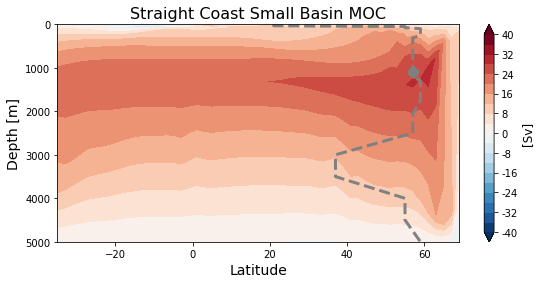

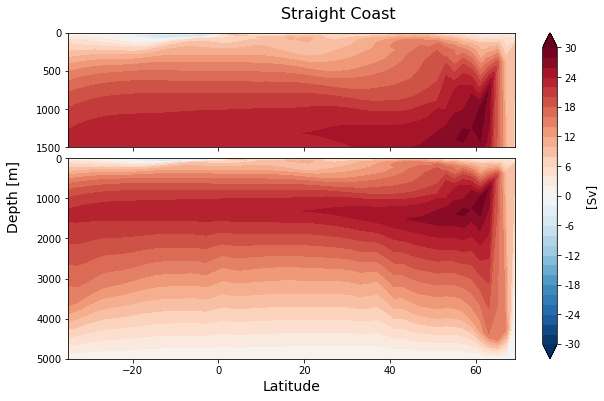

In [24]:
# Straight Coast

# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
# lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_straight, 
                      40, 
                      drho_straight, 
                      lat_north, 
                      lat_straight,
                      dz_straight,
                      max_depth_lat_straight,
                      'Straight Coast')

plot_sfn_subplots(sfn_small_straight, 
                      30, 
                      drho_straight, 
                      lat_north, 
                      lat_straight,
                      dz_straight,
                      max_depth_lat_straight,
                      'Straight Coast')

In [24]:
# plt.plot(lat_straight, dz_straight.z_l)
# plt.gca().invert_yaxis()

print(np.where(lat_straight==37))
print(lat_straight)
print(dz_straight.z_l.isel(z_l=26).values)
print(dz_straight.z_l.isel(z_l=27).values)
print(dz_straight.z_l.isel(z_l=28).values)
print(dz_straight.z_l.isel(z_l=29).values)

(array([27, 28]),)
<xarray.DataArray 'z_l' (z_l: 32)>
array([21., 21., 21., 21., 55., 55., 59., 59., 59., 59., 59., 57., 57.,
       57., 57., 57., 57., 57., 57., 57., 57., 59., 59., 59., 59., 57.,
       57., 37., 37., 55., 55., 59.])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 3.5e+03 4e+03 4.5e+03 5e+03
2500.0
3000.0
3500.0
4000.0


In [15]:
# Wide Coast

# Calculate MOC
sfn_small_wide = calculate_basin_sfn(drho_wide.vmo, drho_wide.vhGM, x_west, x_east, y, y_north)

sfn_small_wide_z = calculate_basin_sfn_z(dz_wide.vmo, dz_wide.vhGM, x_west, x_east, y, y_north)

# Find MOC maximums and latitudes
psi_max_wide, lat_wide, max_depth_lat_wide = find_max_sfn_lat(sfn_small_wide_z, dz_wide, lat_s=-30, lat_n=60)


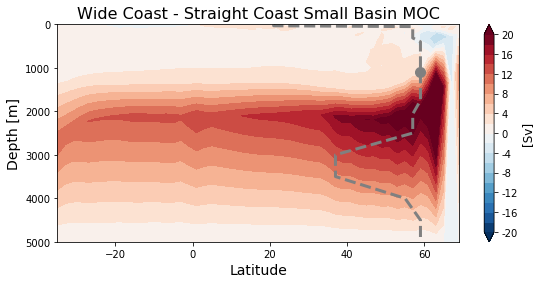

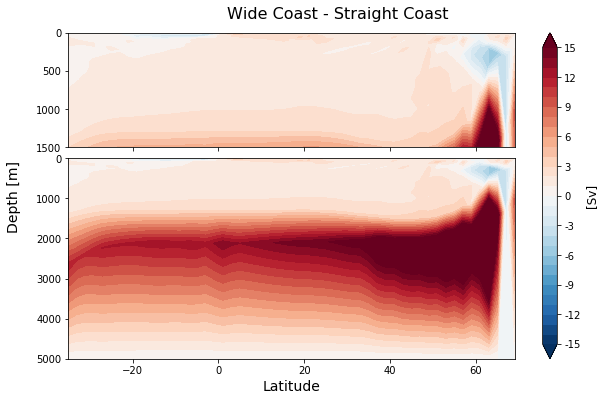

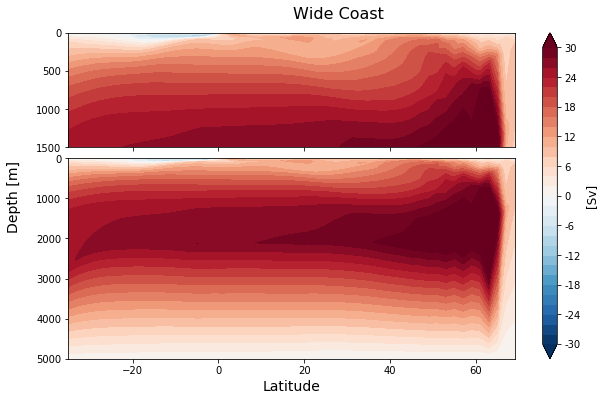

In [27]:
# Wide Coast

# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
# lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_wide - sfn_small_straight, 
                      20, 
                      drho_wide, 
                      lat_north, 
                      lat_wide,
                      dz_wide,
                      max_depth_lat_wide,
                      'Wide Coast - Straight Coast')

plot_sfn_subplots(sfn_small_wide - sfn_small_straight, 
                      15, 
                      drho_wide, 
                      lat_north, 
                      lat_wide,
                      dz_wide,
                      max_depth_lat_wide,
                      'Wide Coast - Straight Coast')

plot_sfn_subplots(sfn_small_wide, 
                      30, 
                      drho_wide, 
                      lat_north, 
                      lat_wide,
                      dz_wide,
                      max_depth_lat_wide,
                      'Wide Coast')

In [17]:
# Both Coast

# Calculate MOC
sfn_small_both = calculate_basin_sfn(drho_both.vmo, drho_both.vhGM, x_west, x_east, y, y_north)

sfn_small_both_z = calculate_basin_sfn_z(dz_both.vmo, dz_both.vhGM, x_west, x_east, y, y_north)

# Find MOC maximums and latitudes
psi_max_both, lat_both, max_depth_lat_both = find_max_sfn_lat(sfn_small_both_z, dz_both, lat_s=-30, lat_n=60)

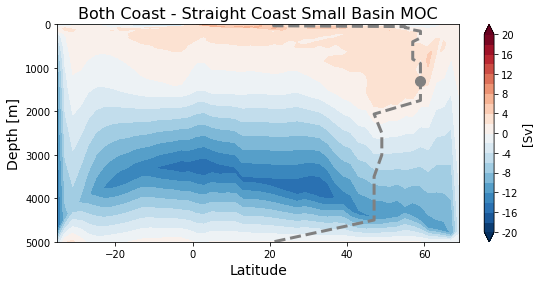

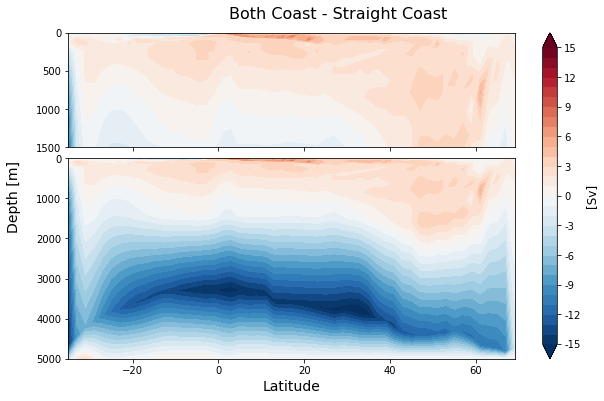

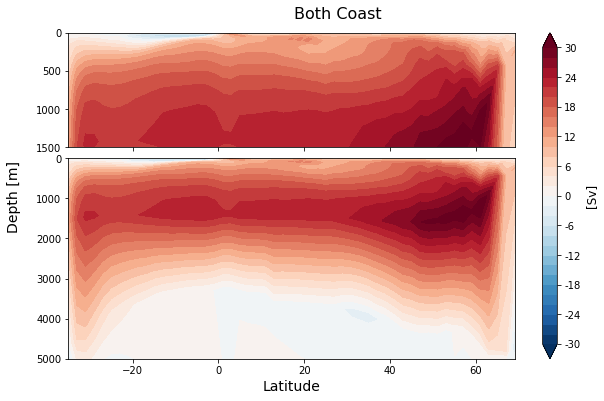

In [28]:
# Both Coast

# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
# lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_both - sfn_small_straight, 
                      20, 
                      drho_both, 
                      lat_north, 
                      lat_both,
                      dz_both,
                      max_depth_lat_both,
                      'Both Coast - Straight Coast')

plot_sfn_subplots(sfn_small_both - sfn_small_straight, 
                      15, 
                      drho_both, 
                      lat_north, 
                      lat_both,
                      dz_both,
                      max_depth_lat_both,
                      'Both Coast - Straight Coast')

plot_sfn_subplots(sfn_small_both, 
                      30, 
                      drho_both, 
                      lat_north, 
                      lat_both,
                      dz_both,
                      max_depth_lat_both,
                      'Both Coast')

In [4]:
# America Coast

# Calculate MOC
sfn_small_am = calculate_basin_sfn(drho_am.vmo, drho_am.vhGM, x_west, x_east, y, y_north)

sfn_small_am_z = calculate_basin_sfn_z(dz_am.vmo, dz_am.vhGM, x_west, x_east, y, y_north)

# Find MOC maximums and latitudes
psi_max_am, lat_am, max_depth_lat_am = find_max_sfn_lat(sfn_small_am_z, dz_am, lat_s=-30, lat_n=60)

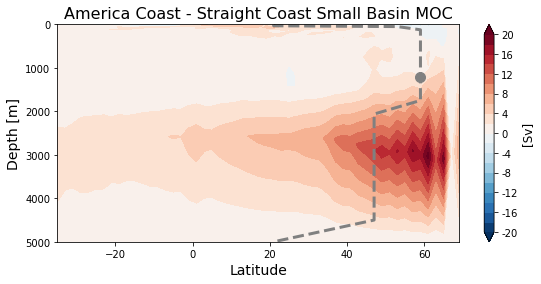

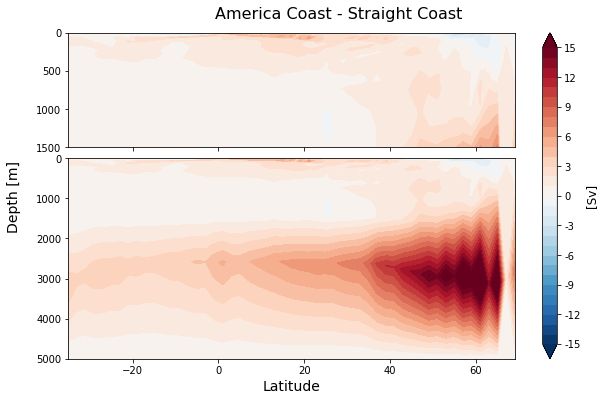

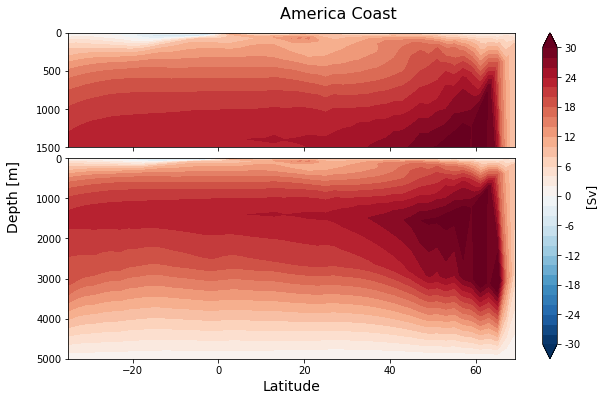

In [29]:
# America Coast

# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
# lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_am - sfn_small_straight, 
                      20, 
                      drho_am, 
                      lat_north, 
                      lat_am,
                      dz_am,
                      max_depth_lat_am,
                      'America Coast - Straight Coast')

plot_sfn_subplots(sfn_small_am - sfn_small_straight, 
                      15, 
                      drho_am, 
                      lat_north, 
                      lat_am,
                      dz_am,
                      max_depth_lat_am,
                      'America Coast - Straight Coast')

plot_sfn_subplots(sfn_small_am, 
                      30, 
                      drho_am, 
                      lat_north, 
                      lat_am,
                      dz_am,
                      max_depth_lat_am,
                      'America Coast')

In [6]:
# Africa Coast

# Calculate MOC
sfn_small_af = calculate_basin_sfn(drho_af.vmo, drho_af.vhGM, x_west, x_east, y, y_north)

sfn_small_af_z = calculate_basin_sfn_z(dz_af.vmo, dz_af.vhGM, x_west, x_east, y, y_north)

# Find MOC maximums and latitudes
psi_max_af, lat_af, max_depth_lat_af = find_max_sfn_lat(sfn_small_af_z, dz_af, lat_s=-30, lat_n=60)

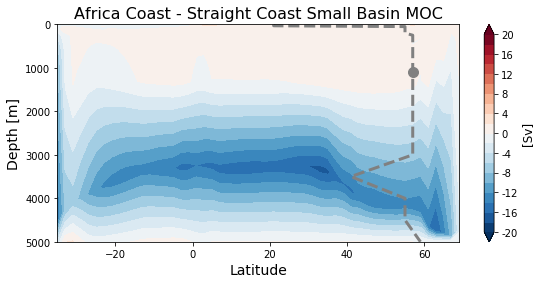

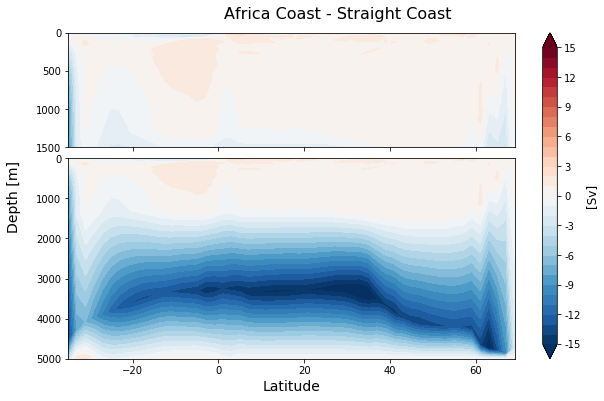

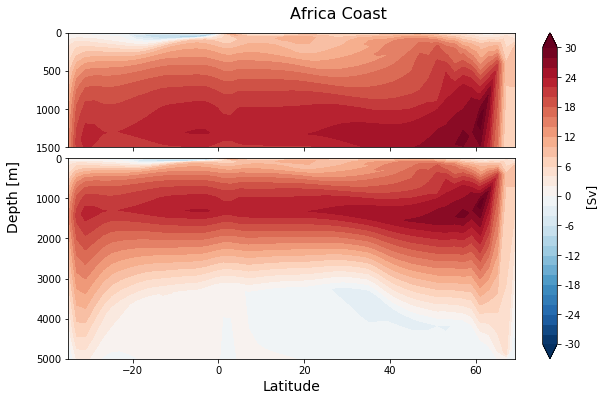

In [30]:
# Africa Coast

# remap overturning in density coordinates to depth coordinates
lat_north =  np.tile(drho_straight.yq[y:y_north],(35,1))
# lat_south = np.tile(drho_straight.yq[y_south:y],(35,1))

plot_sfn_mapped2depth(sfn_small_af - sfn_small_straight, 
                      20, 
                      drho_af, 
                      lat_north, 
                      lat_af,
                      dz_af,
                      max_depth_lat_af,
                      'Africa Coast - Straight Coast')

plot_sfn_subplots(sfn_small_af - sfn_small_straight, 
                      15, 
                      drho_af, 
                      lat_north, 
                      lat_af,
                      dz_af,
                      max_depth_lat_af,
                      'Africa Coast - Straight Coast')

plot_sfn_subplots(sfn_small_af, 
                      30, 
                      drho_af, 
                      lat_north, 
                      lat_af,
                      dz_af,
                      max_depth_lat_af,
                      'Africa Coast')

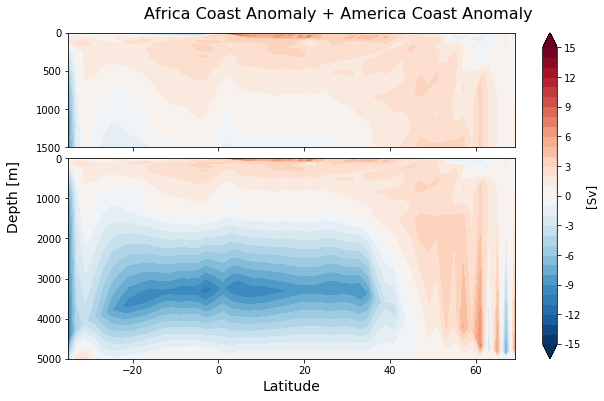

In [13]:
plot_sfn_subplots((sfn_small_af - sfn_small_straight) + (sfn_small_am - sfn_small_straight), 
                      15, 
                      drho_af, 
                      lat_north, 
                      lat_af,
                      dz_af,
                      max_depth_lat_af,
                      'Africa Coast Anomaly + America Coast Anomaly')